In [ ]:
# Inner Joins

# Postgres Join is to combine/attach columns from one to another value 
# based the value on COMMON COLUMNS between table

# INNER JOIN keyword selects all rows from both the tables as long as the condition satisfies. 
# This keyword will create the result-set by combining all rows from both the tables where the condition satisfies 
# i.e value of the common field will be the same.


# Primary keys is first column, Foreign keys is Secondary column

Syntax:

SELECT [* | column_list]
FROM table1
INNER JOIN table2
ON table1.column_name=table2.column.name; 

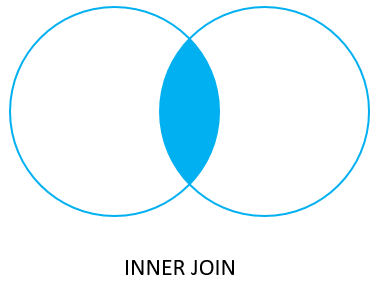

In [ ]:
# All movies

SELECT * FROM movies 
ORDER BY director_id 

movie_id|movie_name                                |movie_length|movie_lang|age_certificate|release_date|director_id|
--------+------------------------------------------+------------+----------+---------------+------------+-----------+
      20|Let the Right One In                      |         128|Swedish   |15             |  2008-10-24|          1|
      46|There Will Be Blood                       |         168|English   |15             |  2007-12-26|          2|
      30|Rushmore                                  |         104|English   |12             |  1998-11-12|          3|
      40|The Darjeeling Limited                    |         119|English   |PG             |  2007-09-29|          3|
      15|Grand Budapest Hotel                      |         117|English   |PG             |  2014-07-03|          3|
      38|Submarine                                 |         115|English   |15             |  2011-06-03|          4|
      41|The Fifth Element                         |         149|English   |12             |  1997-05-09|          5|
      19|Leon                                      |         123|English   |15             |  1994-11-18|          5|
      48|Titanic                                   |         143|English   |12             |  1997-12-19|          6|
    

# a and b only as representatif table, because it will raise an error of "ambiguiti" if not place on there
SELECT 
	a.movie_id,
	a.movie_name,
	(b.first_name ||' '||b.last_name)  director_name 
# Primary keys is first column
FROM movies a
# Foreign keys is Secondary column
INNER JOIN directors b
ON a.director_id = b.director_id 


movie_id|movie_name                                |director_name                    |
--------+------------------------------------------+---------------------------------+
       9|Crouching Tiger Hidden Dragon             |Ang Lee                          |
      22|Life of Pi                                |Ang Lee                          |
      53|Way of the Dragon                         |Bruce Lee                        |
      25|Oldboy                                    |Chan-wook Park                   |
       6|City of God                               |Fernando Meirelles               |
      42|The Lives of Others                       |Florian  Henckel von Donnersmarck|
       2|Apocalypse Now                            |Francis Ford Coppola             |
      35|Star Wars: A New Hope                     |George Lucas                     |

# Note : 
# - In most case for the best case specify individual field names in your selected statement
# - Avoid using tablename.* or table_alias.*
# - Avoid * at all cost
    
    
    

In [ ]:
# Inner Join With Using

# Use USING when joining tables have the same COLUMNS NAMES, rather than ON


# Use USING
SELECT * FROM movies 
INNER JOIN directors USING (director_id)

# Same result : joining table have the same columns names
SELECT * FROM movies a
INNER JOIN directors b ON a.director_id = b.director_id  

# Result
movie_id|movie_name                                |movie_length|movie_lang|age_certificate|release_date|director_id|director_id|first_name|last_name               |date_of_birth|nationality |add_date|update_date|
--------+------------------------------------------+------------+----------+---------------+------------+-----------+-----------+----------+------------------------+-------------+------------+--------+-----------+
       1|A Clockwork Orange                        |         112|English   |18             |  1972-02-02|         13|         13|Stanley   |Kubrick                 |   1928-07-26|American    |        |           |
       2|Apocalypse Now                            |         168|English   |15             |  1979-08-15|          9|          9|Francis   |Ford Coppola            |   1939-04-07|American    |        |           |
       3|Battle Royale                             |         111|Japanese  |18             |  2001-01-04|         10|         10|Kinji     |Fukasaku                |   1930-07-03|Japanese    |        |           |
       4|Blade Runner                              |         121|English   |15             |  1982-06-25|         27|         27|Ridley    |Scott                   |   1937-11-30|British     |        |           |
        
# Same as this        
SELECT * FROM movies 
INNER JOIN movies_revenues  USING (movie_id)


# Note : Pic bellow for relations : same name column when joining
SELECT * FROM movies 
INNER JOIN directors  USING (director_id)
INNER JOIN movies_revenues  USING (movie_id)

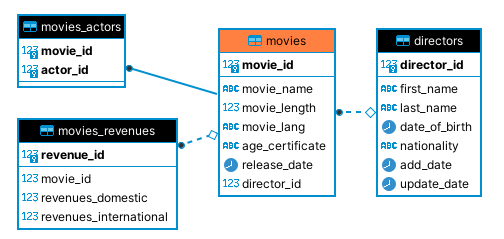

In [ ]:
# Join With Filter Data

# Ambil 4 column dari 3 table lalu filter dengan bahasa film : jepang
SELECT 
	a.movie_name, 
	b.first_name, 
	b.last_name,
	c.revenues_domestic
# FROM is always on first table (PRIMARY KEY)
FROM movies a
# INNER JOIN is always (n) table (FOREIGN KEY)
INNER JOIN directors b ON a.movie_id  = b.director_id 
INNER JOIN movies_revenues c ON a.movie_id = c.revenue_id
# Filter
WHERE a.movie_lang = 'Japanese'


# Result 

movie_name    |first_name|last_name|revenues_domestic|
--------------+----------+---------+-----------------+
Battle Royale |Wes       |Anderson |           102.10|
Cold Fish     |Victor    |Fleming  |           290.30|
Ponyo         |Ridley    |Scott    |            64.10|
Spirited Away |Robert    |Wise     |             1.10|




# Other example_1 

# Select all table with referential and filter with IN (OR), filter with lang, revenue must > 100 & make it descending
SELECT 
*
FROM movies a
INNER JOIN directors b ON a.movie_id  = b.director_id 
INNER JOIN movies_revenues c ON a.movie_id = c.revenue_id
WHERE 
	a.movie_lang IN ('Japanese', 'Chinese', 'Japanese')
	AND c.revenues_domestic > 100
ORDER BY 4 DESC


movie_id|movie_name             |movie_length|movie_lang|age_certificate|release_date|director_id|director_id|first_name|last_name|date_of_birth|nationality|add_date|update_date|revenue_id|movie_id|revenues_domestic|revenues_international|
--------+-----------------------+------------+----------+---------------+------------+-----------+-----------+----------+---------+-------------+-----------+--------+-----------+----------+--------+-----------------+----------------------+
       3|Battle Royale          |         111|Japanese  |18             |  2001-01-04|         10|          3|Wes       |Anderson |   1969-05-01|American   |        |           |         3|      23|           102.10|                      |
       8|Cold Fish              |         108|Japanese  |18             |  2010-09-12|         30|          8|Victor    |Fleming  |   1889-02-23|American   |        |           |         8|      36|           290.30|                247.80|
       5|Chungking Express      |         113|Chinese   |15             |  1996-08-03|         35|          5|Luc       |Besson   |   1959-03-18|French     |        |           |         5|      35|           461.20|                314.20|
      16|House of Flying Daggers|         134|Chinese   |12             |  2004-03-12|         37|         16|Bruce     |Lee      |   1940-11-27|Chinese    |        |           |        16|      49|           180.10|                177.30|
      17|In the Mood for Love   |         124|Chinese   |12             |  2001-02-02|         35|         17|George    |Lucas    |   1944-05-14|American   |        |           |        17|      18|           260.30|                210.90|



# Other Example_2
# Note 
SELECT 
	a.movie_name, 
	b.first_name, 
	b.last_name,
	c.revenues_domestic, 
	c.revenues_international,
	(c.revenues_domestic + c.revenues_international) AS "Total Revenues"
FROM movies a
INNER JOIN directors b ON a.movie_id  = b.director_id 
INNER JOIN movies_revenues c ON a.movie_id = c.revenue_id
# ORDER BY 6 means : The descending must follow by the 6th column
ORDER BY 6 DESC NULLS LAST 
LIMIT 5


movie_name                    |first_name|last_name|revenues_domestic|revenues_international|Total Revenues|
------------------------------+----------+---------+-----------------+----------------------+--------------+
Never Let Me Go               |Sam       |Raimi    |           659.20|               1528.10|       2187.30|
Spider-Man 3                  |Quentin   |Tarantino|           404.10|                418.10|        822.20|
Star Wars: Empire Strikes Back|Robert    |Zemeckis |           374.10|                410.40|        784.50|
Chungking Express             |Luc       |Besson   |           461.20|                314.20|        775.40|
Life of Brian                 |Hayao     |Miyazaki |           330.30|                348.10|        678.40|
    
    


In [ ]:
# Join with different data type 

# first data
CREATE TABLE t1 (test INT)
# second data
CREATE TABLE t2 (test VARCHAR(10))

# CAST to Int data so you can corelate them with referential
SELECT * FROM t1 INNER JOIN t2 ON t1.test = CAST(t2.test AS INT) 



In [ ]:
# LEFT JOIN
# - Return every row from the LEFT Table PLUS rows that match values in joined column for the right table
# - When a left table doesn't have match in the right table, the result shows no value from the right table

# Intinya patokanya sebelah kiri (dilengkapi dulu), sebelah kanan ngikutin klo misalnya ga ada kosongin aja 


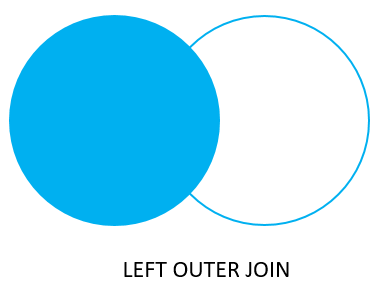

In [ ]:
# Patokanya sebelah kiri
SELECT * FROM left_products a 
LEFT JOIN right_product b ON a.product_id = b.product_id

product_id|product_name|product_id|product_name|
----------+------------+----------+------------+
         1|Computer    |         1|Computer    |
         2|Laptops     |         2|Laptops     |
         3|Monitors    |         3|Monitors    |
         5|Mics        |          |            |
        

# Example_2
SELECT 
a.first_name,
a.last_name,
COUNT(*) AS "total_movies"
FROM directors a
# Patokanya disini (nama2 harus lengkap)
LEFT JOIN movies b ON a.director_id = b.director_id 
# Kemudian digroup untuk tidak terduplikasi
GROUP BY a.first_name, a.last_name 
ORDER BY COUNT(*) DESC

first_name|last_name               |total_movies|
----------+------------------------+------------+
Martin    |Scorsese                |           3|
Wes       |Anderson                |           3|
Stanley   |Kubrick                 |           3|
Sam       |Raimi                   |           3|
George    |Lucas                   |           3|
Ang       |Lee                     |           2|


# Example using filter

SELECT 
*
FROM directors a 
LEFT JOIN movies b ON a.director_id  = b.director_id
WHERE a.nationality IN ('American', 'Chinese', 'Japanese')

director_id|first_name|last_name   |date_of_birth|nationality|add_date|update_date|movie_id|movie_name                    |movie_length|movie_lang|age_certificate|release_date|director_id|
-----------+----------+------------+-------------+-----------+--------+-----------+--------+------------------------------+------------+----------+---------------+------------+-----------+
         13|Stanley   |Kubrick     |   1928-07-26|American   |        |           |       1|A Clockwork Orange            |         112|English   |18             |  1972-02-02|         13|
          9|Francis   |Ford Coppola|   1939-04-07|American   |        |           |       2|Apocalypse Now                |         168|English   |15             |  1979-08-15|          9|
         10|Kinji     |Fukasaku    |   1930-07-03|Japanese   |        |           |       3|Battle Royale                 |         111|Japanese  |18             |  2001-01-04|         10|
         35|Kar Wai   |Wong        |   1958-07-17|Chinese    |        |           |       5|Chungking Express             |         113|Chinese   |15             |  1996-08-03|         35|
         30|Sion      |Sono        |   1961-12-18|Japanese   |        |           |       8|Cold Fish                     |         108|Japanese  |18             |  2010-09-12|         30|
         15|Ang       |Lee         |   1954-10-23|Chinese    |        |           |       9|Crouching Tiger Hidden Dragon |         139|Chinese   |12             |  2000-07-06|         15|

        
        
# Example using GROUP BY
SELECT 
a.first_name,
a.last_name,
SUM(r.revenues_domestic + r.revenues_international) AS "total_revenues"
FROM directors a
LEFT JOIN movies b ON a.director_id = b.director_id 
LEFT JOIN movies_revenues r ON r.movie_id = b.movie_id 
GROUP BY a.first_name, a.last_name 
ORDER BY 3 DESC NULLS LAST 

# Karena patokanya sebelah kiri maka yang kanan klo misalnya ga ada akan dianggap kosong (NULL)
first_name|last_name               |total_revenues|
----------+------------------------+--------------+
Sam       |Raimi                   |       2497.70|
James     |Cameron                 |       2187.30|
George    |Lucas                   |       1788.80|
Sion      |Sono                    |              |
Francis   |Ford Coppola            |              |
Robert    |Stevenson               |              |
Kinji     |Fukasaku                |              |
    
    

In [ ]:
# RIGHT JOIN

# Penejelasanya sama kaya diatas cuma yang ini bagian kanan saja

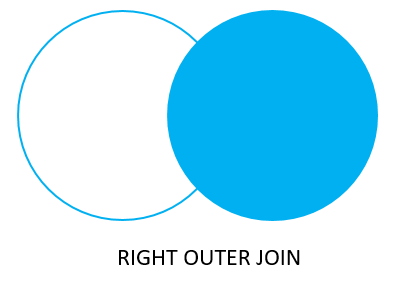

In [ ]:
# sample 

CREATE TABLE films(
   film_id SERIAL PRIMARY KEY,
   title varchar(255) NOT NULL
);

INSERT INTO films(title)
VALUES('Joker'),
      ('Avengers: Endgame'),
      ('Parasite');
   
SELECT * FROM films 

film_id|title            |
-------+-----------------+
      1|Joker            |
      2|Avengers: Endgame|
      3|Parasite         |
    
    

CREATE TABLE film_reviews(
   review_id SERIAL PRIMARY KEY,
   film_id INT,
   review VARCHAR(255) NOT NULL	
);

INSERT INTO film_reviews(film_id, review)
VALUES(1, 'Excellent'),
      (1, 'Awesome'),
      (2, 'Cool'),
      (NULL, 'Beautiful');
     
     
SELECT * FROM film_reviews  

review_id|film_id|review   |
---------+-------+---------+
        1|      1|Excellent|
        2|      1|Awesome  |
        3|      2|Cool     |
        4|       |Beautiful|



# Problem_1     
SELECT 
   review, 
   title
FROM 
   film_reviews
RIGHT JOIN  films
   ON film_reviews.film_id = films.film_id;

# Patokanya kanan Joker meski ada 2 dihajar semua karena id nya dipake, Parasite juga masuk karena harus muncul semua
# review meski lengkap sampe 4, tapi dia ga masuk 
review   |title            |
---------+-----------------+
Excellent|Joker            |
Awesome  |Joker            |
Cool     |Avengers: Endgame|
         |Parasite         |

# Problem_2
SELECT 
   review, 
   title
FROM 
   films
RIGHT JOIN film_reviews 
   ON film_reviews.film_id = films.film_id;

review   |title            |
---------+-----------------+
Excellent|Joker            |
Awesome  |Joker            |
Cool     |Avengers: Endgame|
Beautiful|                 |

# Note : Patokan problem_1 & problem_2 hanya hasilnya saja 






In [ ]:
# FULL JOIN 

# The PostgreSQL FULL OUTER JOIN or FULL JOIN creates the result-set by combining the result 
# of both LEFT JOIN and RIGHT JOIN

# syntax
Syntax:
SELECT table1.column1, table1.column2, table2.column1, ....
FROM table1 
FULL JOIN table2
ON table1.matching_column = table2.matching_column;






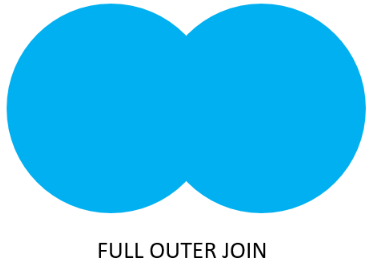

In [ ]:
# problems

CREATE TABLE departments (
	department_id serial PRIMARY KEY,
	department_name VARCHAR (255) NOT NULL
);


CREATE TABLE employees (
	employee_id serial PRIMARY KEY,
	employee_name VARCHAR (255),
	department_id INTEGER
);


INSERT INTO departments (department_name)
VALUES
	('Sales'),
	('Marketing'),
	('HR'),
	('IT'),
	('Production');

INSERT INTO employees (
	employee_name,
	department_id
)
VALUES
	('Bette Nicholson', 1),
	('Christian Gable', 1),
	('Joe Swank', 2),
	('Fred Costner', 3),
	('Sandra Kilmer', 4),
	('Julia Mcqueen', NULL);


SELECT * FROM departments;

department_id|department_name|
-------------+---------------+
            1|Sales          |
            2|Marketing      |
            3|HR             |
            4|IT             |
            5|Production     |
            
            

SELECT * FROM employees;

employee_id|employee_name  |department_id|
-----------+---------------+-------------+
          1|Bette Nicholson|            1|
          2|Christian Gable|            1|
          3|Joe Swank      |            2|
          4|Fred Costner   |            3|
          5|Sandra Kilmer  |            4|
          6|Julia Mcqueen  |             |


# All of rows wether is null or not, FULL JOIN in
SELECT
	employee_name,
	department_name
FROM
	employees e
FULL OUTER JOIN departments d 
        ON d.department_id = e.department_id;

employee_name  |department_name|
---------------+---------------+
Bette Nicholson|Sales          |
Christian Gable|Sales          |
Joe Swank      |Marketing      |
Fred Costner   |HR             |
Sandra Kilmer  |IT             |
Julia Mcqueen  |               |
               |Production     |

In [ ]:
# SELF JOIN :Compare row with the same table
# When to use self join .
# - Query hirarchial data
# - To compare rows within the same table


# Syntax:
SELECT column_list
FROM table_name T1
INNER JOIN table_name T2 ON join_predicate;



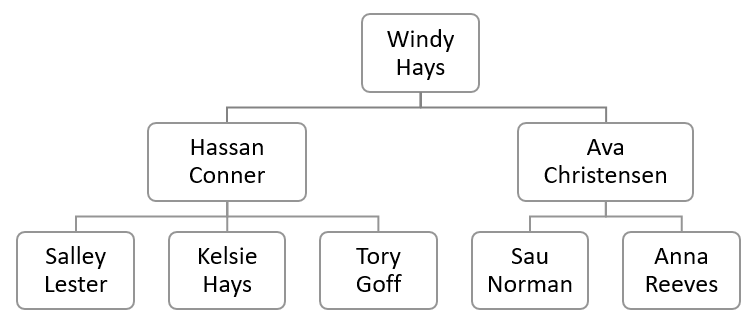

In [ ]:
CREATE TABLE employee (
	employee_id INT PRIMARY KEY,
	first_name VARCHAR (255) NOT NULL,
	last_name VARCHAR (255) NOT NULL,
	manager_id INT,
	FOREIGN KEY (manager_id) 
	REFERENCES employee (employee_id) 
	ON DELETE CASCADE
);


INSERT INTO employee (
	employee_id,
	first_name,
	last_name,
	manager_id
)
VALUES
	(1, 'Windy', 'Hays', NULL),
	(2, 'Ava', 'Christensen', 1),
	(3, 'Hassan', 'Conner', 1),
	(4, 'Anna', 'Reeves', 2),
	(5, 'Sau', 'Norman', 2),
	(6, 'Kelsie', 'Hays', 3),
	(7, 'Tory', 'Goff', 3),
	(8, 'Salley', 'Lester', 3);
	
    
    
SELECT * FROM employee

employee_id|first_name|last_name  |manager_id|
-----------+----------+-----------+----------+
          1|Windy     |Hays       |          |
          2|Ava       |Christensen|         1|
          3|Hassan    |Conner     |         1|
          4|Anna      |Reeves     |         2|
          5|Sau       |Norman     |         2|
          6|Kelsie    |Hays       |         3|
          7|Tory      |Goff       |         3|
          8|Salley    |Lester     |         3|
        
        

# Compare query at the same table
SELECT
    e.first_name || ' ' || e.last_name employee,
    m .first_name || ' ' || m .last_name manager
FROM
    employee e
INNER JOIN employee m ON m .employee_id = e.manager_id
ORDER BY manager;


employee       |manager        |
---------------+---------------+
Sau Norman     |Ava Christensen|
Anna Reeves    |Ava Christensen|
Salley Lester  |Hassan Conner  |
Kelsie Hays    |Hassan Conner  |
Tory Goff      |Hassan Conner  |
Ava Christensen|Windy Hays     |
Hassan Conner  |Windy Hays     |




# Another sample
# Self join
SELECT 
	t1.movie_name,
	t2.director_id
FROM movies t1 
INNER JOIN movies t2 ON t1.director_id = t2.movie_id 
ORDER BY t2.director_id, t1.movie_name 


movie_name                                |director_id|
------------------------------------------+-----------+
City of God                               |          1|
Cold Fish                                 |          3|
Crouching Tiger Hidden Dragon             |          3|
Life of Pi                                |          3|
V for Vendetta                            |          5|
Goodfellas                                |          7|
Raging Bull                               |          7|




In [ ]:
# CROSS JOIN :A CROSS JOIN clause allows you to produce a Cartesian Product of rows in two or more tables.
#             Different from other join clauses such as LEFT JOIN  or INNER JOIN, 
#             the CROSS JOIN clause does not have a join predicate


# syntax 
SELECT select_list
FROM T1
CROSS JOIN T2;


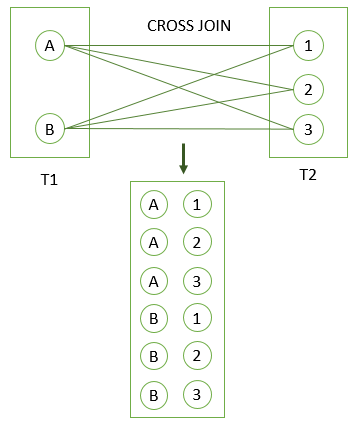

In [ ]:
CREATE TABLE T1 (label CHAR(1) PRIMARY KEY);

CREATE TABLE T2 (score INT PRIMARY KEY);

INSERT INTO T1 (label)
VALUES
	('A'),
	('B');

INSERT INTO T2 (score)
VALUES
	(1),
	(2),
	(3);
	

    
# Query
SELECT * FROM T1
CROSS JOIN T2;


label|score|
-----+-----+
A    |    1|
B    |    1|
A    |    2|
B    |    2|
A    |    3|
B    |    3|




In [ ]:
# NATURAL JOIN : 
# - A natural join is a join that creates an implicit join based on the same column names in the joined tables.
# - Natural join can be inner join, left join, or right join
# - If you do not specify join explicitly then Postgresql use INNER JOIN by default

# syntax
SELECT select_list
FROM T1
NATURAL [INNER, LEFT, RIGHT] JOIN T2;



# Example
CREATE TABLE categories (
	category_id serial PRIMARY KEY,
	category_name VARCHAR (255) NOT NULL
);

CREATE TABLE product (
	product_id serial PRIMARY KEY,
	product_name VARCHAR (255) NOT NULL,
	category_id INT NOT NULL,
	FOREIGN KEY (category_id) REFERENCES categories (category_id)
);

INSERT INTO categories (category_name)
VALUES
	('Smart Phone'),
	('Laptop'),
	('Tablet');


INSERT INTO product (product_name, category_id)
VALUES
	('iPhone', 1),
	('Samsung Galaxy', 1),
	('HP Elite', 2),
	('Lenovo Thinkpad', 2),
	('iPad', 3),
	('Kindle Fire', 3);


SELECT * FROM products
NATURAL JOIN categories;

category_id|product_id|product_name   |category_name|
-----------+----------+---------------+-------------+
          1|         1|iPhone         |Smart Phone  |
          1|         2|Samsung Galaxy |Smart Phone  |
          2|         3|HP Elite       |Laptop       |
          2|         4|Lenovo Thinkpad|Laptop       |
          3|         5|iPad           |Tablet       |
          3|         6|Kindle Fire    |Tablet       |
